#Cargar datos


In [ ]:
from google.colab import files
datos = files.upload()


Saving IRIS.csv to IRIS (2).csv


#Importamos

In [ ]:
import pandas as pd
import io
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
datos_Iris = pd.read_csv(io.BytesIO(datos["IRIS.csv"]))
datos_Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#Verificamos la informacion

In [ ]:
datos_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#Verificar si hay datos nullos

In [ ]:
datos_Iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##Volvemos los valores enteros


In [ ]:
values_species = {"species": {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}}
datos_Iris.replace(values_species, inplace=True)
datos_Iris['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [ ]:
datos_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
datos_Iris.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species
4.9           3.1          1.5           0.1          0          3
5.8           2.7          5.1           1.9          2          2
5.4           3.4          1.7           0.2          0          1
5.5           2.5          4.0           1.3          1          1
              2.4          3.8           1.1          1          1
                                                                ..
6.3           2.5          4.9           1.5          1          1
              2.3          4.4           1.3          1          1
6.2           3.4          5.4           2.3          2          1
              2.9          4.3           1.3          1          1
4.3           3.0          1.1           0.1          0          1
Length: 147, dtype: int64

Graficamos para ver los datos

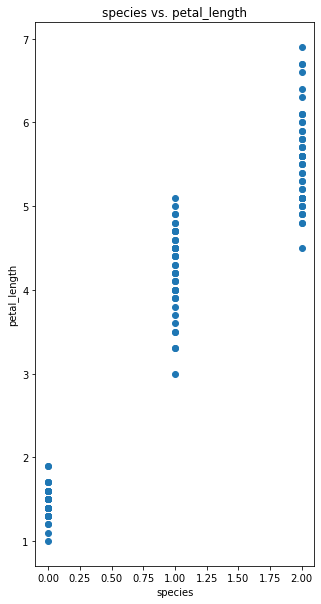

In [ ]:
plt.subplots(figsize=(5, 10))
plt.scatter(x=datos_Iris['species'],y=datos_Iris['petal_length'])
plt.title('species vs. petal_length')
plt.xlabel('species')
plt.ylabel('petal_length')
plt.show()

#Separamos los datos

In [ ]:
x = datos_Iris.drop(columns=['species','sepal_width']) 
y = datos_Iris['species']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth = 4, random_state = 0)

In [ ]:
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_test_pred = tree_classifier.predict(x_test)

generamos una tabla la cual nos da la prediccion de nuestro modelo

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_test_pred))
print("Precision test: %.3f" % accuracy_score(y_test_pred, y_test))
print("Precision global: %.3f" % tree_classifier.score(x_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Precision test: 0.956
Precision global: 0.956


#Conclusion

El mejor modelo de clasificación es el modelo de Árbol de Decisión, el cual obtuvo un porcentaje de acierto del 95.6%